# **Wine Quality Prediction**

In this notebook, we will predict the quality of wine using supervised machine learning. Our objective is to build a classification model (Random Forest Classifier) that predicts wine quality based on its physicochemical properties.

## 1. Problem Description

### 1.1 Goal

To predict the quality of wine based on its physicochemical properties such as acidity, sugar content, and alcohol level. This is useful for quality control in the wine industry.

### 1.2 Dataset

We will use the **Wine Quality Dataset** from the UCI Machine Learning Repository (gathered from public source URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

- **Features**:
  - `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `pH`, `sulphates`, `alcohol`
- **Target**:
  - `quality`: Quality of the wine (scale from 0 to 10)

## 2. Exploratory Data Analysis (EDA)

### 2.1 Loading the Data

We'll start by loading and inspecting the dataset.


In [44]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
# Extensive data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2.2 Checking for Missing Values

Let's check if there are any missing values in the dataset.


In [46]:
# Check for missing values
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.3 Handling Missing Values

If there are missing values, we will handle them by either imputing them with mean/median or dropping rows/columns with missing values.


In [47]:
# Check for missing values again to decide on the imputation strategy
missing_values = df.isnull().sum()

# Impute missing values with the median (if any)
df.fillna(df.median(), inplace=True)

# Verify that there are no more missing values
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### 2.4 Summary Statistics

We will now look at the summary statistics for the dataset.


In [48]:
# Summary statistics
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.5 Distribution of Wine Quality

We'll visualize the distribution of wine quality ratings.


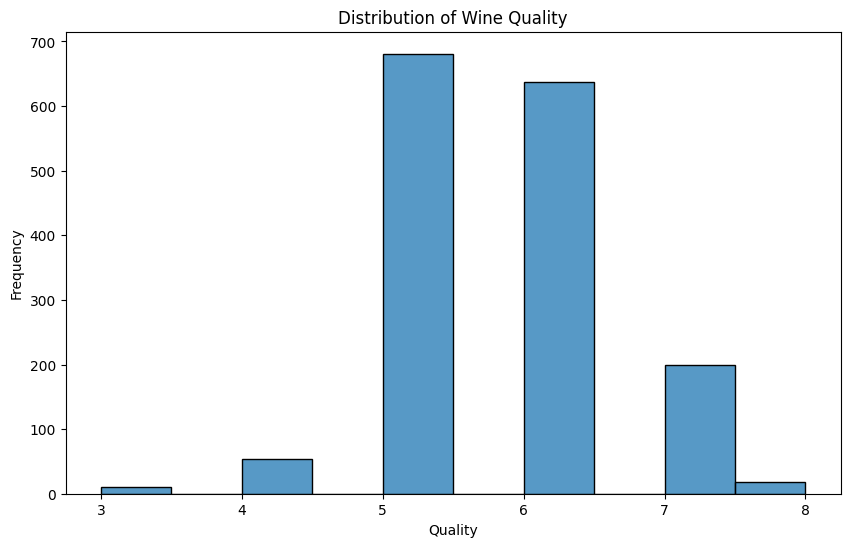

In [49]:
# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=False, bins=10)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


### 2.6 Visualizing Feature Relationships

Let's explore the relationship between some features and the wine quality.


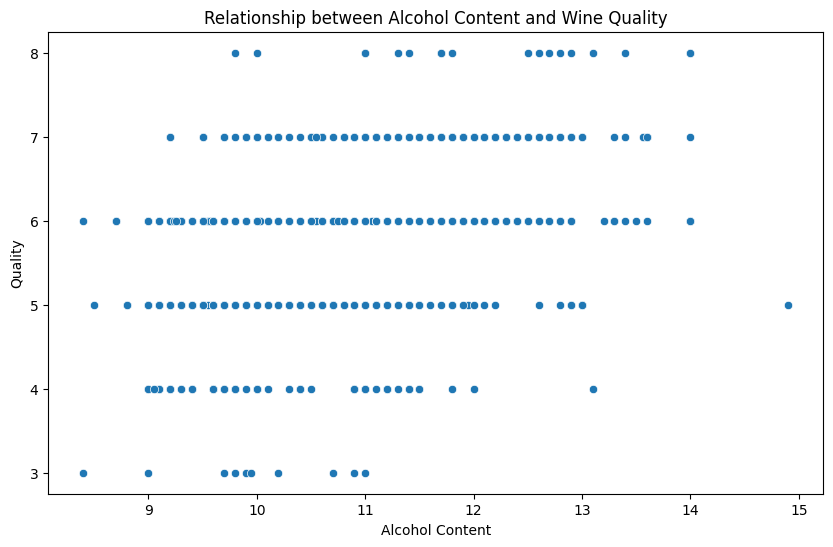

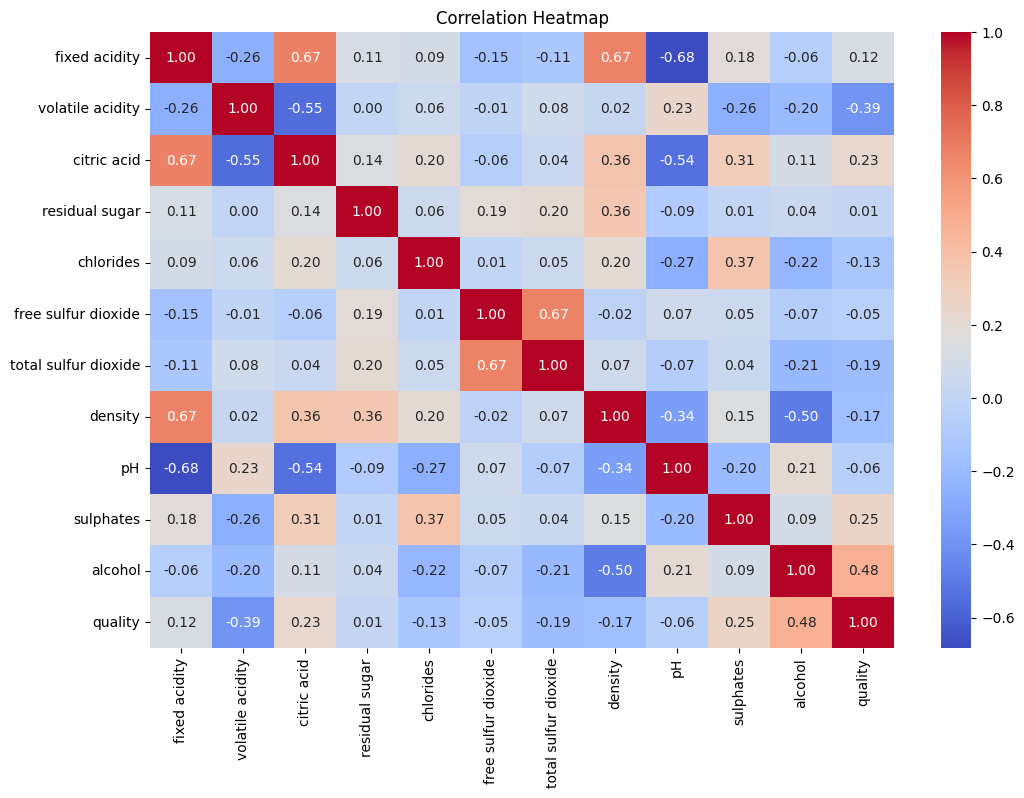

In [50]:
# Scatter plot of alcohol vs quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Relationship between Alcohol Content and Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Conclusion on EDA
First, we conducted Exploratory Data Analysis (EDA) to understand the dataset better. We looked at summary statistics, distributions of features, and the correlation between them. Key insights from the EDA include:

- Distribution of Quality Ratings: The majority of the wines are rated between 5 and 6.
- Feature Correlations: We found that alcohol content has a positive correlation with wine quality, while volatile acidity has a negative correlation.

##3. Model Building and Enhancement

### 3.1 Feature Engineering
We will create additional features by exploring interactions between existing features. For instance, the ratio of 'sulphates' to 'alcohol' can be a new feature to capture potential interactions.

In [52]:
# Additional Feature
df['sulphates_alcohol_ratio'] = df['sulphates'] / (df['alcohol'] + 1)

# Newly added feature to the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphates_alcohol_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.053846
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.062963
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.060185
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.053704
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.053846


### 3.2 Handling Collinearity
To address collinearity, we use feature importance from the Random Forest model to select the most relevant features.

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                    Feature  Importance
10                  alcohol    0.139952
6      total sulfur dioxide    0.099305
9                 sulphates    0.094271
1          volatile acidity    0.091590
7                   density    0.084464
11  sulphates_alcohol_ratio    0.082118
4                 chlorides    0.073241
8                        pH    0.070707
0             fixed acidity    0.069256
2               citric acid    0.066726
3            residual sugar    0.066249
5       free sulfur dioxide    0.062121


Alcohol content has the highest importance, suggesting that it plays a crucial role in determining wine quality. This aligns with the general understanding that alcohol content influences taste and quality.

### 3.3 Hyperparameter Tuning
We will use Grid Search Cross-Validation to find the best hyperparameters for the Random Forest model.

In [37]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


 A total of 120 different configurations were evaluated across 5-fold cross-validation.

- Model Performance:

 The chosen hyperparameters are designed to enhance the model's ability to predict wine quality accurately. With max_depth set to None, the model can capture the detailed relationships between wine features like alcohol content, sulfur dioxide levels, and other attributes with the wine quality ratings. The large number of estimators (200) ensures that the model’s predictions are robust and less prone to variance.

- Computational Efficiency:

 The configuration with 200 trees means that the model will be computationally intensive. Given the importance of model performance in accurately predicting wine quality, it's crucial to ensure that the computational resources are adequate. Efficient model training and evaluation are necessary to handle this increased complexity.

- Risk of Overfitting:

 The risk of overfitting is notable due to the high flexibility allowed by max_depth and the min_samples_leaf set to 1. This could lead to a model that performs exceptionally well on training data but may not generalize well to unseen data. It is crucial to monitor the model's performance on a separate validation or test set to mitigate this risk.

### 3.4 Model Training and Cross-Validation
Train the model with the best parameters found and evaluate using cross-validation.

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Train model with best parameters
best_rf = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())

# Evaluate on test set
y_pred = best_rf.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation scores:  [0.575      0.553125   0.6        0.58125    0.57053292]
Mean CV score:  0.5759815830721003
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 94  7  0]
 [ 0  0  0 22 20  0]
 [ 0  0  0  0  5  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.71      0.66       132
           7       0.61      0.48      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##4. Conclusion on Model building and performance
Based on the evaluation of the Random Forest model for predicting wine quality, we can draw the following conclusions:

### 1. Cross-Validation Performance
The cross-validation scores for the Random Forest model are as follows:

- Scores: [0.575, 0.553125, 0.6, 0.58125, 0.57053292]
- Mean Cross-Validation Score: 0.576

The mean cross-validation score of approximately 0.576 indicates that the model's performance is moderate. This score reflects the model's general ability to predict wine quality across different subsets of the data, suggesting it performs reasonably well but may benefit from further improvements.

### 2. Confusion Matrix Analysis
- Classes 3 and 4: The model struggles to predict these classes accurately, with zero correct predictions for class 3 and only a few for class 4.
- Class 5: The model performs well with a high number of correct predictions, reflecting good performance in predicting this class.
- Class 6: The model shows reasonable performance with a majority of correct predictions.
- Class 7: The model's performance is lower compared to classes 5 and 6, with fewer correct predictions.
- Class 8: The model does not perform well for this class, with zero correct predictions.

### 3. Classification Report
- Overall Accuracy: The model achieves an accuracy of 66%, indicating a moderate level of performance.
- Macro Average: The macro average precision, recall, and F1-score are all relatively low (~0.32), suggesting that the model does not perform uniformly well across all classes.
- Weighted Average: The weighted average metrics are better (precision: 0.62, recall: 0.66, F1-score: 0.64), showing that the model performs better on classes with more samples (primarily classes 5 and 6).

### 4. Recommendations for Improvement
- Data Augmentation: Implement SMOTE or other data augmentation techniques to balance the class distribution. This would help the model to learn better representations of minority classes, potentially improving overall performance.SMOTE generates synthetic examples for the minority class in the dataset. Instead of duplicating existing minority class samples, it creates new, synthetic samples by interpolating between existing ones. For each instance in the minority class, SMOTE identifies its k-nearest neighbors (usually set to 5). It then generates synthetic samples by randomly selecting neighbors and creating new instances that lie along the line segments between the original instance and its neighbors. By adding synthetic examples, SMOTE helps balance the class distribution, making it easier for machine learning algorithms to learn and generalize patterns for the minority class.

- Advanced Models: Experiment with more sophisticated models or ensembles that might better capture the nuances in the data. Techniques like XGBoost or LightGBM could be considered as they often handle imbalanced datasets more effectively.

## Discussion and Takeaways
- **Class Imbalance**: The significant imbalance in the number of samples per class led to poor performance in predicting less frequent classes. This is evident from the confusion matrix and classification report, where the model fails to correctly classify certain classes (e.g., 3 and 8). Addressing this imbalance through techniques such as SMOTE could help improve the model's ability to predict all classes more effectively.

- **Feature Importance**: Analyzing feature importance revealed that certain chemical attributes are more influential in determining wine quality. This insight can guide further feature engineering efforts. Features with high importance should be examined to understand their impact on quality prediction, while less influential features might be reconsidered or removed.

- **Model Selection and Hyperparameter Tuning**: Although the Random Forest model provided a good baseline, exploring other models such as Gradient Boosting Machines or Support Vector Machines could offer improved performance. Additionally, conducting more extensive hyperparameter tuning could refine the Random Forest model's performance further.

- **Performance Metrics**: The classification report showed that while precision, recall, and F1-scores for classes 5 and 6 are reasonable, they are lower for other classes. This discrepancy highlights the need for techniques that can handle class imbalance better or for models that can better generalize across all classes.

In summary, while the Random Forest model provides a solid foundation, there is significant potential for improvement. Addressing class imbalance, exploring advanced models, refining feature engineering, and optimizing hyperparameters are key areas that could enhance performance and provide more accurate predictions of wine quality.